In [1]:
#Importar Librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Configurar estilos de seaborn
plt.style.use('seaborn-darkgrid')

#Leer datos
df = pd.read_csv('bicicletas/recorridos-realizados-2021.csv')
df.head()

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,MEMBER,ICONIC,CODE
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,MEMBER,ICONIC,CODE
2,11204928,NORMAL,299,232,2021-06-02 16:10:08,252 - Tamborini,2021-06-02 16:15:07,386.0,277 - Coghlan,690073,MEMBER,ICONIC,CODE
3,11204920,NORMAL,400,117,2021-06-02 16:09:34,117 - HUMBERTO 1°,2021-06-02 16:16:14,175.0,147 - Constitución,713938,MEMBER,ICONIC,CODE
4,11204919,NORMAL,591,212,2021-06-02 16:09:32,129 - Velasco,2021-06-02 16:19:23,158.0,158 - VILLARROEL,35926,MEMBER,ICONIC,CODE


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328726 entries, 0 to 1328725
Data columns (total 13 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   ID                                  1328726 non-null  int64  
 1   Estado cerrado                      1328726 non-null  object 
 2   Duración                            1328726 non-null  int64  
 3   Id de estación de inicio            1328726 non-null  int64  
 4   Fecha de inicio                     1328726 non-null  object 
 5   Nombre de estación de inicio        1328726 non-null  object 
 6   Fecha de fin                        1328726 non-null  object 
 7   Id de estación de fin de viaje      1328723 non-null  float64
 8   Nombre de estación de fin de viaje  1328723 non-null  object 
 9   ID de ciclista                      1328726 non-null  int64  
 10  Tipo de ciclista                    1328726 non-null  object 
 11  Modelo de b

In [3]:
#El porcentaje de valores nulos no tiene significancia en el conjunto de los datos

Analisis de los datos

1 - ¿Cuántas tiempo suelen utilizar la bicicleta?

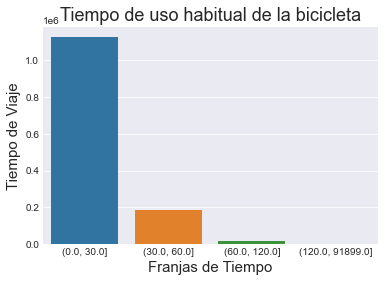

In [4]:
#Convertir duracion de segundos a minutos
df['Duración'] = df['Duración']/60

#Crear bins (0-30min, 30-60min, 60-120min, 120 y mas)
max_limit = df['Duración'].max()
df['duracion_bins'] = pd.cut(df['Duración'], [0, 30, 60, 120, max_limit])
sns.barplot(x='duracion_bins', y='Duración', data=df, estimator=np.size)
plt.title('Tiempo de uso habitual de la bicicleta', fontsize=18)
plt.xlabel('Franjas de Tiempo', fontsize=15)
plt.ylabel('Tiempo de Viaje', fontsize=15)
plt.show()

2 -Misma ubicación inicial y final versus diferente ubicación inicial y final

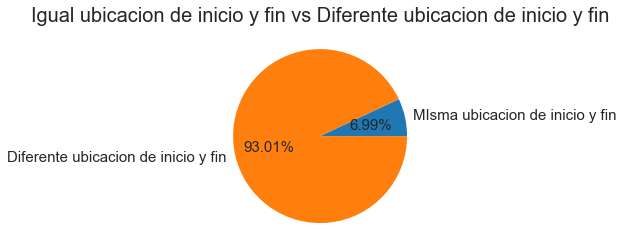

In [5]:
#Cantidad de viajes que empiezan y terminan en la misma estacion
mismo_inicio_fin = df[df['Nombre de estación de inicio'] == df['Nombre de estación de fin de viaje']].shape[0]

#Contidad de viajes que empiezan y terminan en diferente estacion
diferente_inicio_fin = df.shape[0]-mismo_inicio_fin
plt.pie([mismo_inicio_fin,diferente_inicio_fin],
        labels=['MIsma ubicacion de inicio y fin',
        'Diferente ubicacion de inicio y fin'],
        autopct='%1.2f%%',
        textprops={'fontsize': 15})
plt.title('Igual ubicacion de inicio y fin vs Diferente ubicacion de inicio y fin', fontsize=20)
plt.show()

3 - Patrón de recorridos mensual


In [6]:
#Convertimos la fecha de inicio del viaje a datatime
df['Fecha de inicio']= pd.to_datetime(df['Fecha de inicio'])

In [7]:
#Filtramos el mes de abril
filtro= df['Fecha de inicio'].dt.month == 4
df1 = df[filtro]

In [8]:
#Agrupamos para obtener la frecuencia de viajes por dia
contar_tiempo_inicio = df1.set_index('Fecha de inicio').groupby(pd.Grouper(freq='D')).count()

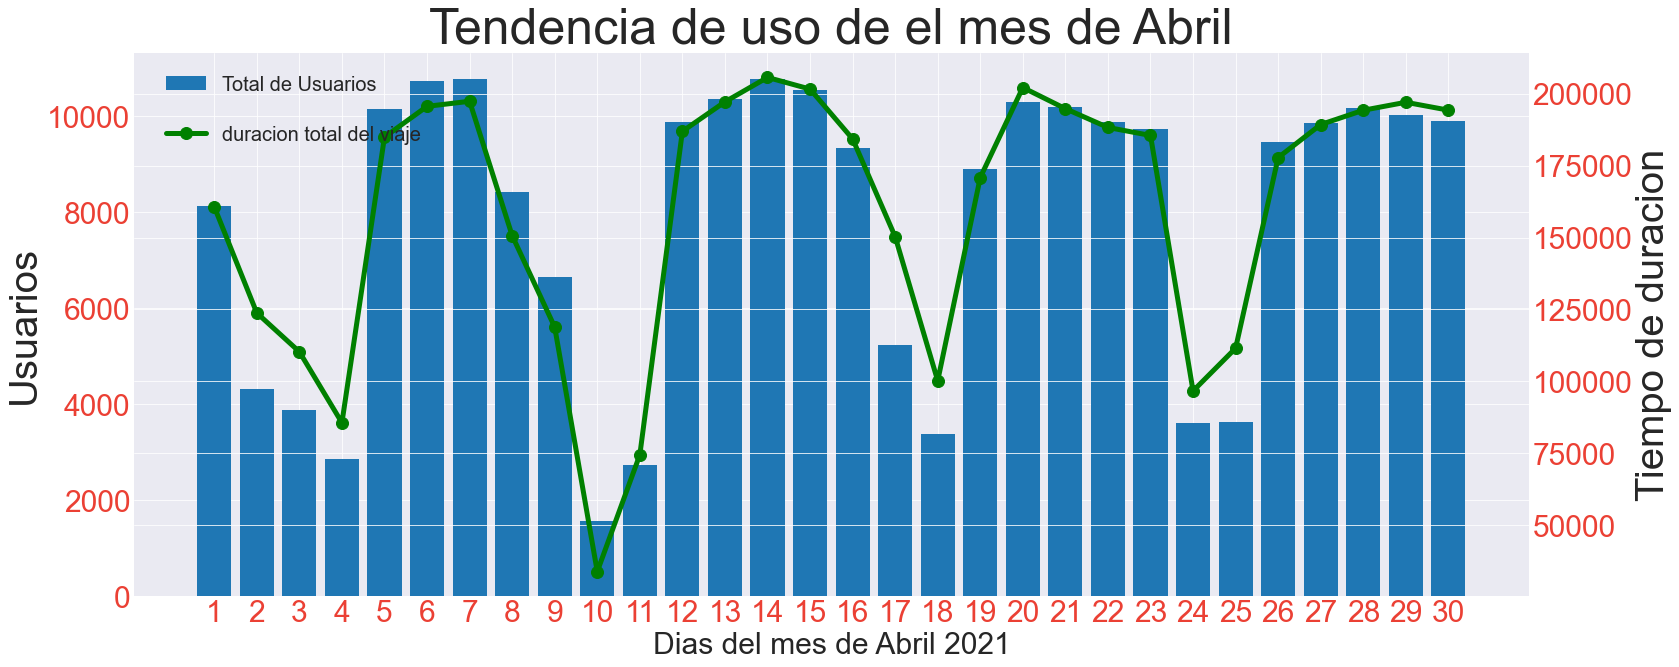

In [9]:
#Agrupamos para sumarizar la duracion de los viajes por dia
contar_duracion_viaje = df1.set_index('Fecha de inicio').groupby(pd.Grouper(freq='D')).sum()

#ploteamos el total de viajes por dia
#usamos el id de la estacion inicial para obtener la cantidad 
fig,ax=plt.subplots(figsize=(25,10))
ax.bar(contar_tiempo_inicio.index, 'Id de estación de inicio', data=contar_tiempo_inicio, label='Total de Usuarios')
#bbox_to_anchor posiciona la caja de la leyenda
ax.legend(loc ="lower left", bbox_to_anchor=(0.01, 0.89), fontsize='20')
ax.set_xlabel('Dias del mes de Abril 2021', fontsize=30)
ax.set_ylabel('Usuarios',  fontsize=40)
ax.set_title('Tendencia de uso de el mes de Abril', fontsize=50)

#Creamos los axis para plotear en la misma figura
ax2=ax.twinx()
#ploteamos el total de la duracion del viaje para todos los usuarios por dia
ax2.plot('Duración', data=contar_duracion_viaje, color='g', 
        label='duracion total del viaje', marker='o', linewidth=5, markersize=12)
ax2.set_ylabel('Tiempo de duracion',  fontsize=40)
ax2.legend(loc ="upper left", bbox_to_anchor=(0.01, 0.9), fontsize='20')

ax.set_xticks(contar_duracion_viaje.index)
ax.set_xticklabels([i for i in range(1,31)])

#Ticks etiquetas de axes1
ax.tick_params(labelsize=30, labelcolor='#eb4034')
#tweeking x and y ticks labels of axes2
ax2.tick_params(labelsize=30, labelcolor='#eb4034')

plt.show()

4a- Top 10 estaciones de salida

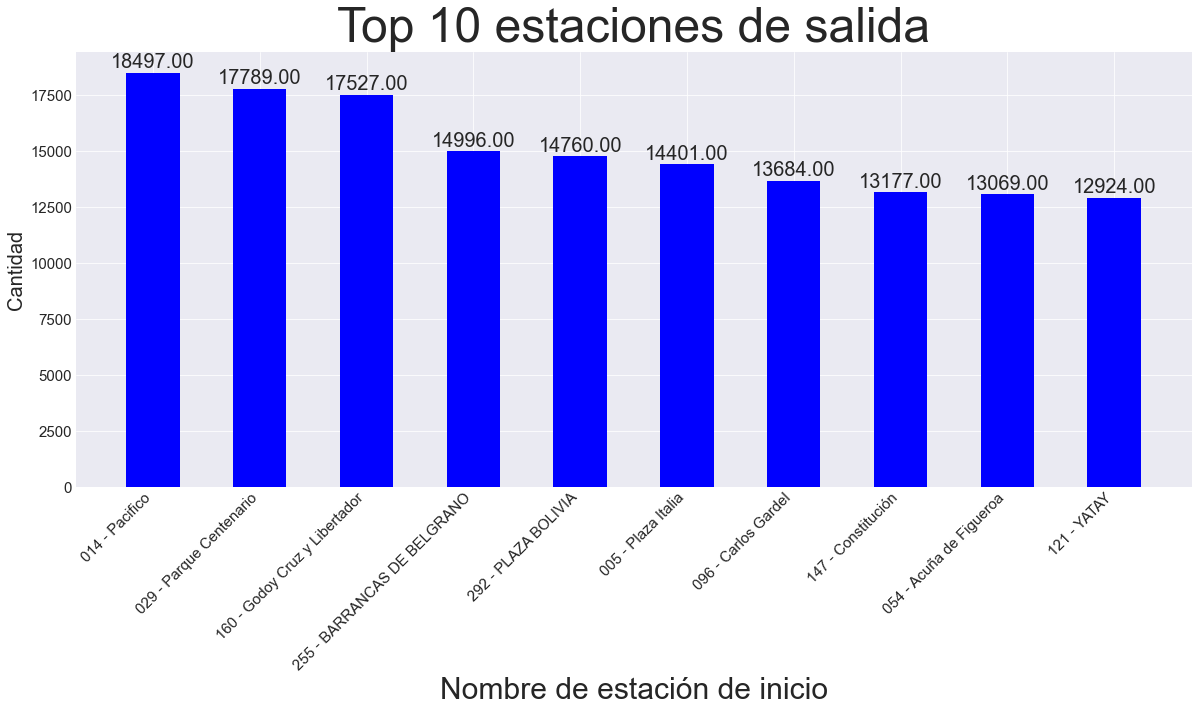

In [10]:
top_estacion_inicial = df['Nombre de estación de inicio'].value_counts()[:10]

fig,ax=plt.subplots(figsize=(20,8))
ax.bar(x=top_estacion_inicial.index, height=top_estacion_inicial.values, color='b', width=0.5)

#Agregar valor encima de cada barra:Annotation
for p in ax.patches:
    an = ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    an.set_size(20)
ax.set_title("Top 10 estaciones de salida",fontsize=48)
ax.set_xlabel("Nombre de estación de inicio",fontsize=30)
#rotar x tick labels a 45 grados
ax.set_xticklabels(top_estacion_inicial.index, rotation = 45, ha="right")
ax.set_ylabel("Cantidad",fontsize=20)
 
ax.tick_params(labelsize=15)

plt.show()

4b -Top 10 estaciones finales

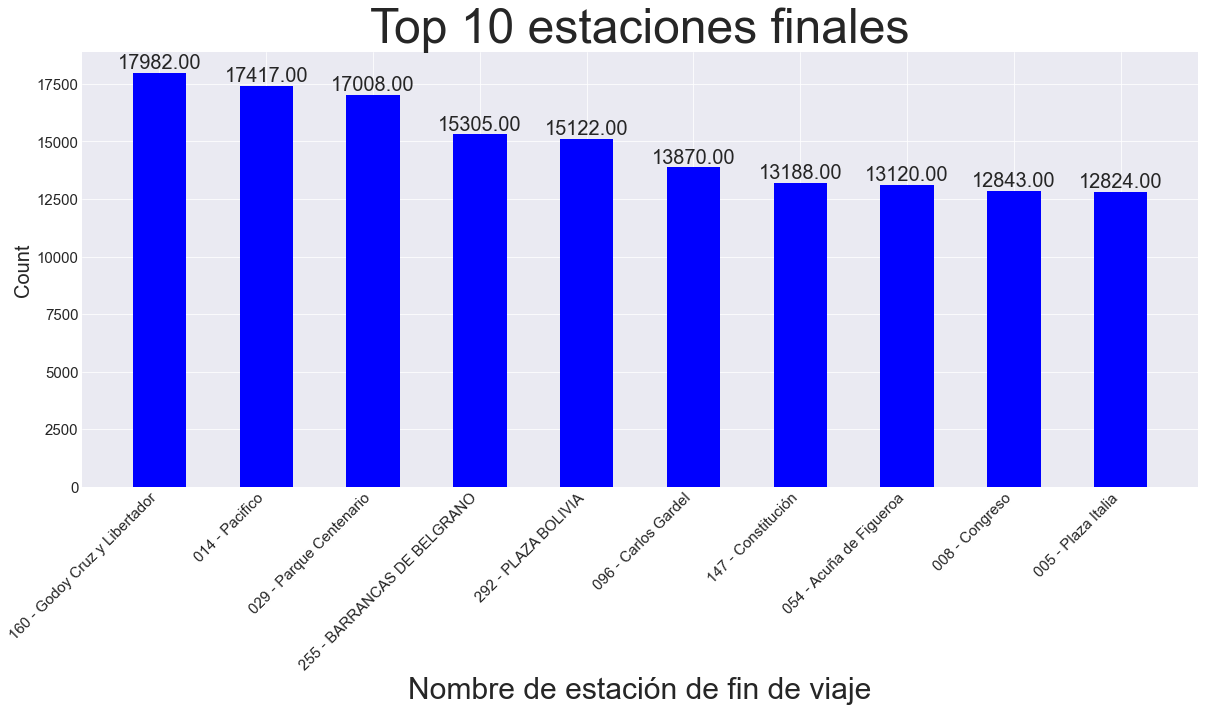

In [11]:
top_estacion_final = df['Nombre de estación de fin de viaje'].value_counts()[:10]

fig,ax=plt.subplots(figsize=(20,8))
ax.bar(x=top_estacion_final.index, height=top_estacion_final.values, color='b', width=0.5)

#Agregar valor encima de cada barra:Annotation
for p in ax.patches:
    an = ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    an.set_size(20)
ax.set_title("Top 10 estaciones finales",fontsize=48)
ax.set_xlabel("Nombre de estación de fin de viaje",fontsize=30)
#rotar x tick labels a 45 grados
ax.set_xticklabels(top_estacion_final.index, rotation = 45, ha="right")
ax.set_ylabel("Count",fontsize=20)
 
ax.tick_params(labelsize=15)

plt.show()

#### Total de viajes por dia de semana

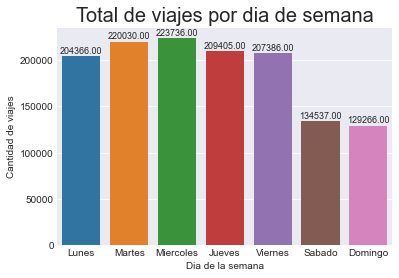

In [12]:
#plotting Total de viajes por dia de semana
splot = sns.countplot(df['Fecha de inicio'].dt.dayofweek, data=df)


for p in splot.patches:
    an = splot.annotate(format(p.get_height(), '.2f'),
               
               (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    an.set_size(9)
splot.axes.set_title("Total de viajes por dia de semana",fontsize=20)
splot.axes.set_xlabel("Dia de la semana",fontsize=10)
splot.axes.set_ylabel("Cantidad de viajes",fontsize=10)
#adding x tick values
splot.axes.set_xticklabels(['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado','Domingo'])
plt.show()